In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from mega import model_df
import numpy as np
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import seaborn as sns
from sklearn.decomposition import PCA



In [3]:
model_df_copy = model_df.copy()

In [4]:
# Handle missing values if needed
model_df_copy.fillna(model_df_copy.mean(numeric_only=True), inplace=True)

In [5]:
# Encode categorical variables if needed
if 'W/L' in model_df_copy.columns:
    label_encoder = LabelEncoder()
    model_df_copy['W/L'] = label_encoder.fit_transform(model_df_copy['W/L'])


In [6]:
# Assuming model_df is your dataframe
print(model_df_copy.dtypes)


Gm#                int64
W/L                int32
D/N               object
H/A               object
Opp               object
COL_at_bats        int64
COL_ba           float64
COL_hits           int64
COL_hr             int64
COL_kk             int64
COL_obp          float64
COL_walks          int64
Opp_at_bats        int64
Opp_ba           float64
Opp_hits          object
OPP_HR_Column      int64
OPP_kk            object
Opp_obp          float64
Opp_walks          int64
dtype: object


In [7]:
#Convert specific columns
model_df_copy['W/L'] = model_df_copy['W/L'].astype(np.int64)

In [8]:
model_df_copy.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1751 entries, 0 to 1812
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Gm#            1751 non-null   int64  
 1   W/L            1751 non-null   int64  
 2   D/N            1751 non-null   object 
 3   H/A            1751 non-null   object 
 4   Opp            1751 non-null   object 
 5   COL_at_bats    1751 non-null   int64  
 6   COL_ba         1751 non-null   float64
 7   COL_hits       1751 non-null   int64  
 8   COL_hr         1751 non-null   int64  
 9   COL_kk         1751 non-null   int64  
 10  COL_obp        1751 non-null   float64
 11  COL_walks      1751 non-null   int64  
 12  Opp_at_bats    1751 non-null   int64  
 13  Opp_ba         1751 non-null   float64
 14  Opp_hits       1751 non-null   object 
 15  OPP_HR_Column  1751 non-null   int64  
 16  OPP_kk         1751 non-null   object 
 17  Opp_obp        1751 non-null   float64
 18  Opp_walks    

In [9]:
model_df_copy

,Gm#,W/L,D/N,H/A,Opp,COL_at_bats,COL_ba,COL_hits,COL_hr,COL_kk,COL_obp,COL_walks,Opp_at_bats,Opp_ba,Opp_hits,OPP_HR_Column,OPP_kk,Opp_obp,Opp_walks
0,1,0,D,A,MIL,31,0.258065,8,1,8,0.351351,4,38,0.315789,12,3,11,0.333333,1
1,2,1,N,A,MIL,32,0.281250,9,1,5,0.342857,3,37,0.378378,14,2,11,0.390244,2
2,3,1,N,A,MIL,34,0.264706,9,1,5,0.305556,2,37,0.405405,15,3,8,0.463415,4
3,4,1,D,H,SDP,33,0.212121,7,0,8,0.235294,1,0,0.000000,0,0,0,0.000000,0
4,5,1,N,H,SDP,33,0.242424,8,0,4,0.305556,3,0,0.000000,0,0,0,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1808,129,0,N,A,NYY,28,0.178571,5,2,5,0.233333,2,31,0.129032,4,0,9,0.205882,3
1809,130,1,D,A,NYY,29,0.172414,5,1,9,0.294118,4,39,0.333333,13,2,14,0.386364,4
1810,131,0,D,A,NYY,35,0.342857,12,5,6,0.410256,3,29,0.206897,6,0,8,0.323529,5
1811,132,1,N,H,MIA,34,0.264706,9,0,8,0.324324,3,28,0.214286,6,1,11,0.312500,4


In [10]:
print(model_df_copy)

      Gm#  W/L D/N H/A  Opp  COL_at_bats    COL_ba  COL_hits  COL_hr  COL_kk  \
0       1    0   D   A  MIL           31  0.258065         8       1       8   
1       2    1   N   A  MIL           32  0.281250         9       1       5   
2       3    1   N   A  MIL           34  0.264706         9       1       5   
3       4    1   D   H  SDP           33  0.212121         7       0       8   
4       5    1   N   H  SDP           33  0.242424         8       0       4   
...   ...  ...  ..  ..  ...          ...       ...       ...     ...     ...   
1808  129    0   N   A  NYY           28  0.178571         5       2       5   
1809  130    1   D   A  NYY           29  0.172414         5       1       9   
1810  131    0   D   A  NYY           35  0.342857        12       5       6   
1811  132    1   N   H  MIA           34  0.264706         9       0       8   
1812  133    0   N   H  MIA           35  0.342857        12       2       5   

       COL_obp  COL_walks  Opp_at_bats 

In [11]:
# Separate features and target variable
X = model_df_copy.drop('W/L', axis=1)  # Features
y = model_df_copy['W/L']  # Target variable

In [12]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
print(X_train.dtypes)  # Print data types of each column


Gm#                int64
D/N               object
H/A               object
Opp               object
COL_at_bats        int64
COL_ba           float64
COL_hits           int64
COL_hr             int64
COL_kk             int64
COL_obp          float64
COL_walks          int64
Opp_at_bats        int64
Opp_ba           float64
Opp_hits          object
OPP_HR_Column      int64
OPP_kk            object
Opp_obp          float64
Opp_walks          int64
dtype: object


In [14]:
# Assuming X_train is a pandas DataFrame
print(X_train.head())  # Show the first few rows of the DataFrame
print(X_train.info())  # Get information about column data types
print(X_train.describe(include='all'))  # Describe all columns, including non-numeric ones

# Check for non-numeric data
for col in X_train.columns:
    if X_train[col].dtype == 'object':
        print(f"Non-numeric column '{col}' unique values: {X_train[col].unique()}")


      Gm# D/N H/A  Opp  COL_at_bats    COL_ba  COL_hits  COL_hr  COL_kk  \
203    42   D   A  KCR           29  0.275862         8       0       1   
1424   69   N   A  MIA           33  0.333333        11       3       6   
820    11   N   H  SDP           37  0.351351        13       2      10   
1270   76   D   A  MIL           39  0.230769         9       3      16   
1627  110   N   A  STL           33  0.333333        11       1       4   

       COL_obp  COL_walks  Opp_at_bats    Opp_ba Opp_hits  OPP_HR_Column  \
203   0.322581          2            0  0.000000        0              0   
1424  0.388889          3           30  0.200000        6              1   
820   0.351351          0            0  0.000000        0              0   
1270  0.279070          2           39  0.179487        7              1   
1627  0.394737          4           33  0.212121        7              1   

     OPP_kk   Opp_obp  Opp_walks  
203       0  0.000000          0  
1424      8  0.305556 

In [15]:
le = LabelEncoder()
for col in X_train.select_dtypes(include=['object']).columns:
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])  # Ensure X_test is also transformed


In [16]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
# Apply KNN
knn = KNeighborsClassifier(n_neighbors=5)  # Adjust the number of neighbors as needed
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)


In [18]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.75


In [19]:
print(X_train.dtypes)  # Print data types of each column


Gm#                int64
D/N                int32
H/A                int32
Opp                int32
COL_at_bats        int64
COL_ba           float64
COL_hits           int64
COL_hr             int64
COL_kk             int64
COL_obp          float64
COL_walks          int64
Opp_at_bats        int64
Opp_ba           float64
Opp_hits           int32
OPP_HR_Column      int64
OPP_kk             int32
Opp_obp          float64
Opp_walks          int64
dtype: object


In [20]:
# Define the parameter grid
param_grid = {'n_neighbors': list(range(1, 21))}  # Testing from 1 to 20 neighbors

# Initialize the KNN classifier
knn = KNeighborsClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Get the best model
best_knn = grid_search.best_estimator_

# Predict using the best model
y_pred = best_knn.predict(X_test_scaled)


Best Parameters: {'n_neighbors': 10}
Best Score: 0.7714285714285714


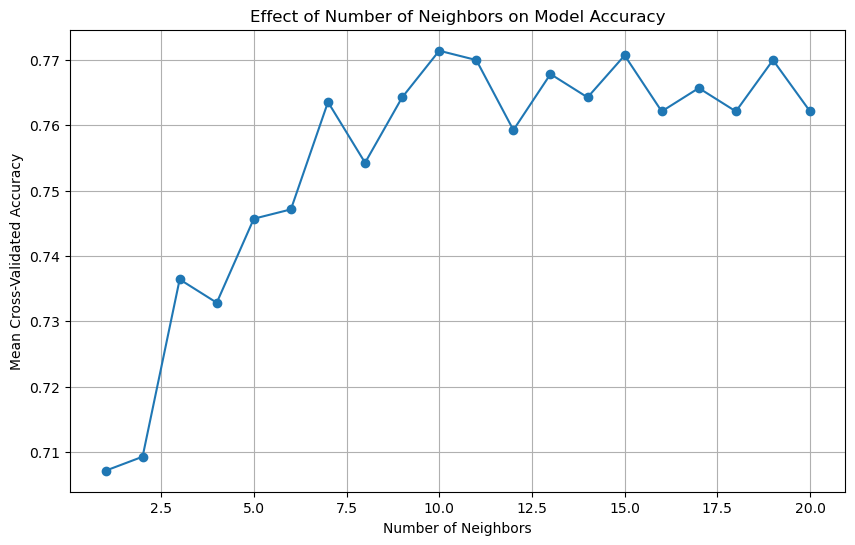

In [21]:
neighbors = list(range(1, 21))
mean_scores = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='accuracy')
    mean_scores.append(scores.mean())

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(neighbors, mean_scores, marker='o')
plt.xlabel('Number of Neighbors')
plt.ylabel('Mean Cross-Validated Accuracy')
plt.title('Effect of Number of Neighbors on Model Accuracy')
plt.grid(True)
plt.show()


In [22]:
# Apply KNN
knn = KNeighborsClassifier(n_neighbors=10)  
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)


Accuracy: 0.7407407407407407
Confusion Matrix:
[[177  33]
 [ 58  83]]
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.84      0.80       210
           1       0.72      0.59      0.65       141

    accuracy                           0.74       351
   macro avg       0.73      0.72      0.72       351
weighted avg       0.74      0.74      0.74       351



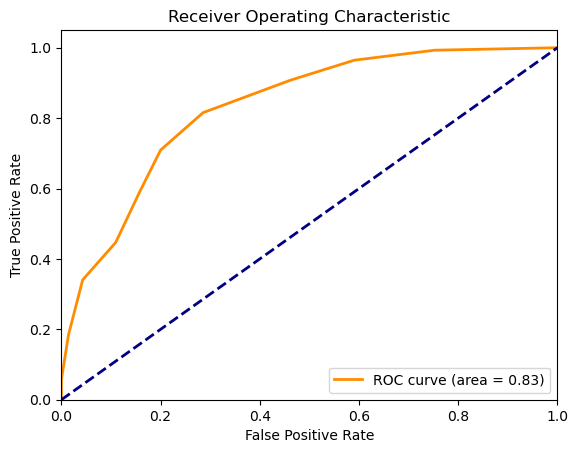

In [23]:
# Assuming X_train_scaled, X_test_scaled, y_train, and y_test are already defined

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# For binary classification: ROC Curve and AUC
if len(np.unique(y_test)) == 2:  # Check if it's binary classification
    y_proba = knn.predict_proba(X_test_scaled)[:, 1]  # Get probabilities for the positive class
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)

    # Plot ROC Curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()


Training Accuracy: 0.805
Training Confusion Matrix:
[[764  72]
 [201 363]]
Training Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.91      0.85       836
           1       0.83      0.64      0.73       564

    accuracy                           0.81      1400
   macro avg       0.81      0.78      0.79      1400
weighted avg       0.81      0.81      0.80      1400



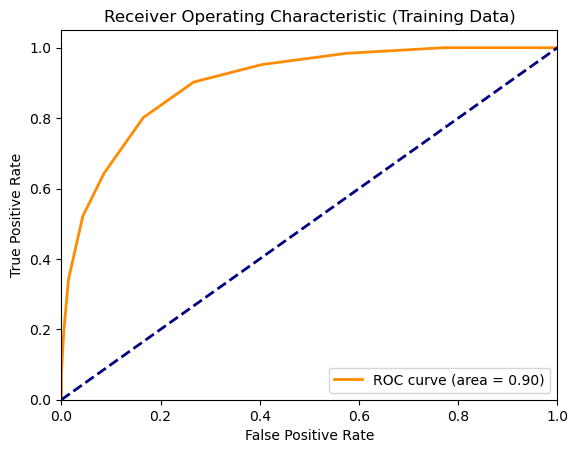

In [24]:
# Make predictions on the training set
y_train_pred = knn.predict(X_train_scaled)

# Evaluate the model on the training set
accuracy_train = accuracy_score(y_train, y_train_pred)
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
class_report_train = classification_report(y_train, y_train_pred)

print("Training Accuracy:", accuracy_train)
print("Training Confusion Matrix:")
print(conf_matrix_train)
print("Training Classification Report:")
print(class_report_train)

# For binary classification: ROC Curve and AUC on training data
if len(np.unique(y_train)) == 2:  # Check if it's binary classification
    y_train_proba = knn.predict_proba(X_train_scaled)[:, 1]  # Get probabilities for the positive class
    fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_proba)
    roc_auc_train = auc(fpr_train, tpr_train)

    # Plot ROC Curve for training data
    plt.figure()
    plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_train)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (Training Data)')
    plt.legend(loc="lower right")
    plt.show()


Test Accuracy: 0.7407407407407407
Test Confusion Matrix:
[[177  33]
 [ 58  83]]
Test Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.84      0.80       210
           1       0.72      0.59      0.65       141

    accuracy                           0.74       351
   macro avg       0.73      0.72      0.72       351
weighted avg       0.74      0.74      0.74       351



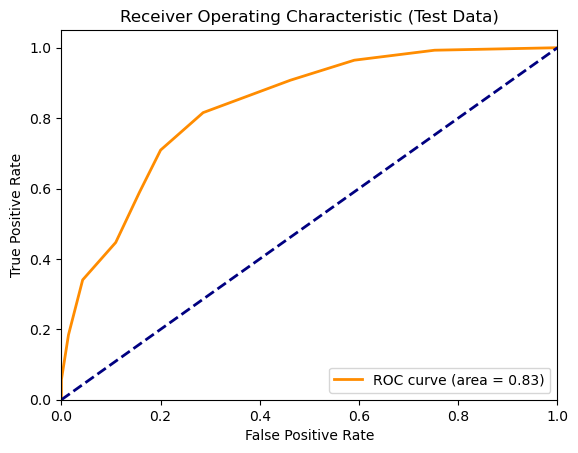

In [25]:
# Make predictions on the training set
y_test_pred = knn.predict(X_test_scaled)

# Evaluate the model on the training set
accuracy_train = accuracy_score(y_test, y_test_pred)
conf_matrix_train = confusion_matrix(y_test, y_test_pred)
class_report_train = classification_report(y_test, y_test_pred)

print("Test Accuracy:", accuracy_train)
print("Test Confusion Matrix:")
print(conf_matrix_train)
print("Test Classification Report:")
print(class_report_train)

# For binary classification: ROC Curve and AUC on training data
if len(np.unique(y_test)) == 2:  # Check if it's binary classification
    y_test_proba = knn.predict_proba(X_test_scaled)[:, 1]  # Get probabilities for the positive class
    fpr_train, tpr_train, thresholds_train = roc_curve(y_test, y_test_proba)
    roc_auc_train = auc(fpr_train, tpr_train)

    # Plot ROC Curve for training data
    plt.figure()
    plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_train)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (Test Data)')
    plt.legend(loc="lower right")
    plt.show()


In [26]:
# Create a StandardScater model and fit it to the training data
X_scaler = StandardScaler()
X_scaler.fit(X_train)


StandardScaler()

In [27]:
# Transform the training and testing data by using the X_scaler model
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


k: 1, Train/Test Score: 1.000/0.721
k: 3, Train/Test Score: 0.861/0.721
k: 5, Train/Test Score: 0.840/0.749
k: 7, Train/Test Score: 0.821/0.746
k: 9, Train/Test Score: 0.824/0.752
k: 11, Train/Test Score: 0.810/0.746
k: 13, Train/Test Score: 0.809/0.741
k: 15, Train/Test Score: 0.806/0.749
k: 17, Train/Test Score: 0.801/0.775
k: 19, Train/Test Score: 0.798/0.766


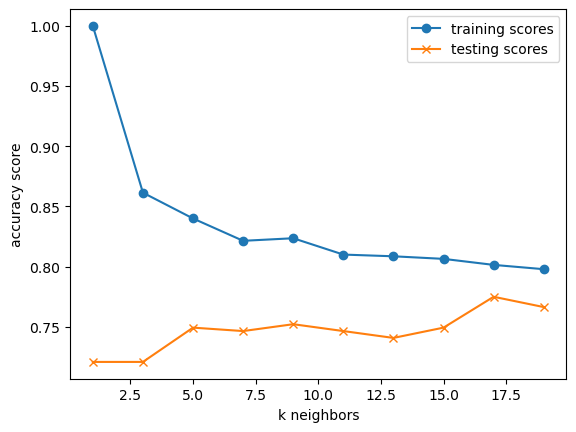

In [28]:
# Loop through different k values to find which has the highest accuracy.
# Note: We use only odd numbers because we don't want any ties.
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
# Plot the results
plt.plot(range(1, 20, 2), train_scores, marker='o', label="training scores")
plt.plot(range(1, 20, 2), test_scores, marker="x", label="testing scores")
plt.xlabel("k neighbors")
plt.ylabel("accuracy score")
plt.legend()
plt.show()


In [29]:
# Train the KNN model with the best k value
# Note that k: 9 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train_scaled, y_train)
print('k=9 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=9 Test Acc: 0.752


c:\Users\dixon\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


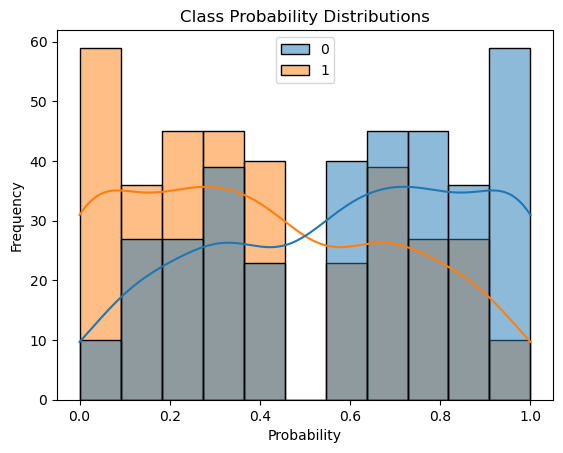

In [30]:
#The provided code produces a visualization of the probability distributions for each class in a classification model. 
# Get class probabilities
y_test_proba = knn.predict_proba(X_test_scaled)
proba_df = pd.DataFrame(y_test_proba, columns=knn.classes_)

# Plot distributions of probabilities
sns.histplot(data=proba_df, kde=True)
plt.title('Class Probability Distributions')
plt.xlabel('Probability')
plt.ylabel('Frequency')
plt.show()


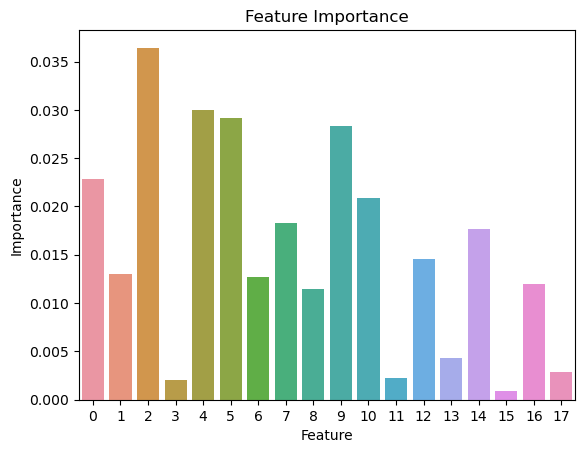

In [31]:
#Imports the permutation_importance function from scikit-learn.
#Used to assess the importance of features by measuring how the performance of the model changes
#when the values of a feature are randomly shuffled

from sklearn.inspection import permutation_importance

results = permutation_importance(knn, X_train_scaled, y_train, scoring='accuracy')
importance_df = pd.DataFrame({
    'Feature': range(X_train_scaled.shape[1]),
    'Importance': results.importances_mean
})

importance_df.sort_values(by='Importance', ascending=False, inplace=True)
sns.barplot(x='Feature', y='Importance', data=importance_df)
plt.title('Feature Importance')
plt.show()


In [32]:
# Assuming X_train is the original DataFrame used to create X_train_scaled
feature_names = X_train.columns
print("Feature names:", feature_names)


Feature names: Index(['Gm#', 'D/N', 'H/A', 'Opp', 'COL_at_bats', 'COL_ba', 'COL_hits',
       'COL_hr', 'COL_kk', 'COL_obp', 'COL_walks', 'Opp_at_bats', 'Opp_ba',
       'Opp_hits', 'OPP_HR_Column', 'OPP_kk', 'Opp_obp', 'Opp_walks'],
      dtype='object')


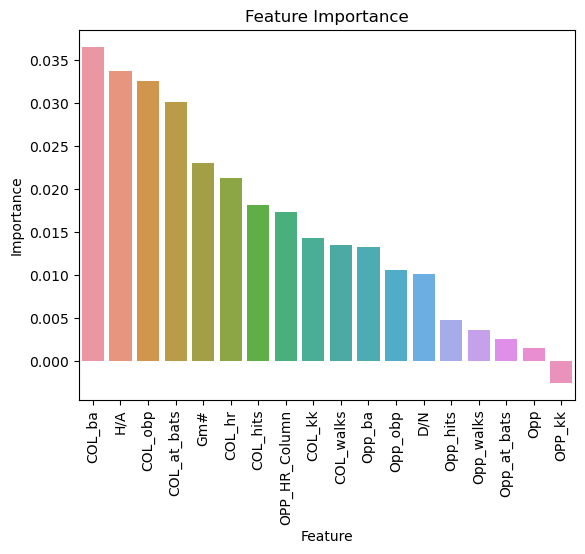

In [33]:
# Define feature names manually 
# Replace these with your actual feature names
feature_names = ['Gm#', 'D/N', 'H/A', 'Opp', 'COL_at_bats', 'COL_ba', 'COL_hits',
    'COL_hr', 'COL_kk', 'COL_obp', 'COL_walks', 'Opp_at_bats', 'Opp_ba',
    'Opp_hits', 'OPP_HR_Column', 'OPP_kk', 'Opp_obp', 'Opp_walks']  

# Compute permutation importance
results = permutation_importance(knn, X_train_scaled, y_train, scoring='accuracy')

# Create a DataFrame for the importances
importance_df = pd.DataFrame({
    'Feature': feature_names,  # Use your feature names
    'Importance': results.importances_mean
})

# Sort the DataFrame by importance
importance_df.sort_values(by='Importance', ascending=False, inplace=True)

# Create the bar plot with feature names
sns.barplot(x='Feature', y='Importance', data=importance_df)
plt.title('Feature Importance')
plt.xticks(rotation=90)  # Rotate feature names for better readability
plt.show()


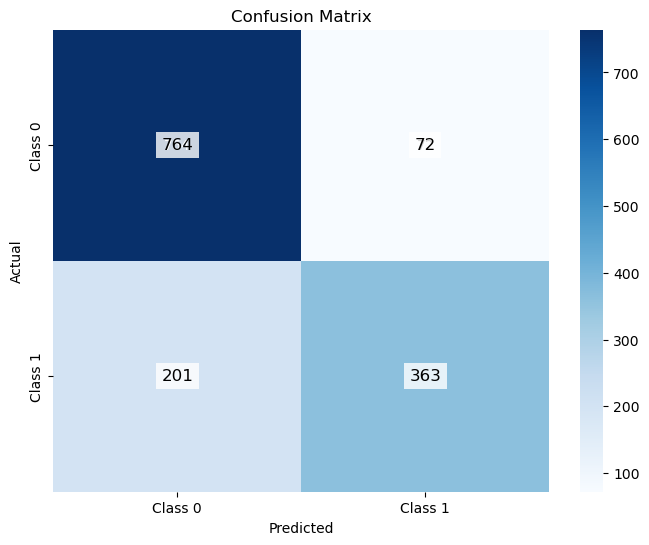

In [34]:
# Define the confusion matrix
confusion_matrix = np.array([[764, 72],
                             [201, 363]])

# Define class labels
class_labels = ['Class 0', 'Class 1']

# Create the heatmap
plt.figure(figsize=(8, 6))
ax = sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)

# Ensure visibility of text
for i in range(confusion_matrix.shape[0]):
    for j in range(confusion_matrix.shape[1]):
        ax.text(j + 0.5, i + 0.5, f'{confusion_matrix[i, j]}',
                color='black', ha='center', va='center',
                fontsize=12, bbox=dict(facecolor='white', edgecolor='none', alpha=0.8))
           
# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Show the plot
plt.show()


In [38]:
mean = np.mean(X_train_scaled, axis=0)
std_dev = np.std(X_train_scaled, axis=0)
min_val = np.min(X_train_scaled, axis=0)
max_val = np.max(X_train_scaled, axis=0)

print(f"Mean: {mean}")
print(f"Standard Deviation: {std_dev}")
print(f"Min: {min_val}")
print(f"Max: {max_val}")


Mean: [-7.10542736e-17 -1.38936481e-16  5.45595315e-17  2.79141789e-17
  1.64947421e-16  1.35764416e-16  8.37425367e-17  5.07530526e-18
  1.57334463e-16 -8.62801893e-17 -1.52259158e-17  4.31400947e-17
  1.06581410e-16 -2.28388736e-17  4.82153999e-17 -4.82153999e-17
 -3.29894842e-17  2.53765263e-18]
Standard Deviation: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Min: [-1.66734046 -1.39770759 -0.99714693 -1.6391597  -2.85343846 -2.90941757
 -2.3093419  -1.0463064  -2.28693959 -3.32997265 -1.71082395 -1.17941517
 -1.06063137 -0.88901146 -0.65650475 -0.91508343 -1.0976674  -0.83157626]
Max: [1.79170125 0.71545723 1.00286124 1.57987042 5.20157699 3.67655101
 5.11417402 5.0790238  3.46249328 3.48476862 4.12196083 2.53712871
 2.43782891 1.70112327 5.26049083 1.6569238  2.10524744 3.87969214]


In [40]:
shape = X_train_scaled.shape
size = X_train_scaled.size

print(f"Shape: {shape}")
print(f"Size: {size}")


Shape: (1400, 18)
Size: 25200


In [42]:
correlation_matrix = np.corrcoef(X_train_scaled, rowvar=False)
print(correlation_matrix)


[[ 1.00000000e+00  4.52057487e-02  2.45451342e-02 -3.32070502e-02
   1.89427500e-02  4.25697243e-02  3.51605684e-02  4.39733983e-02
   4.73632752e-02  3.51875259e-02 -1.50894325e-02 -7.49795410e-03
  -2.31521673e-03 -5.49608409e-04  4.90037638e-02 -9.70129018e-03
  -8.64706751e-03 -2.87527082e-02]
 [ 4.52057487e-02  1.00000000e+00 -1.71382679e-02 -3.06757327e-02
  -1.57372943e-02  1.13500126e-02  6.33353835e-03  1.01512854e-03
  -8.04516905e-02  6.43800105e-04 -2.53498763e-02 -2.44968021e-02
  -2.83973610e-02 -3.36746525e-02  5.28212752e-03  2.49403399e-03
  -3.54919113e-02 -4.42610414e-02]
 [ 2.45451342e-02 -1.71382679e-02  1.00000000e+00  1.49481388e-02
   3.28662411e-01  1.42640922e-01  2.26751462e-01  5.92427211e-02
   1.37209602e-02  7.18090869e-02 -4.62436752e-02  3.41329082e-03
   1.28953677e-01 -9.46306256e-02  6.10459328e-02  7.26101600e-02
   1.07007067e-01  3.90192902e-02]
 [-3.32070502e-02 -3.06757327e-02  1.49481388e-02  1.00000000e+00
  -1.63417692e-02 -3.70150240e-02 -2.

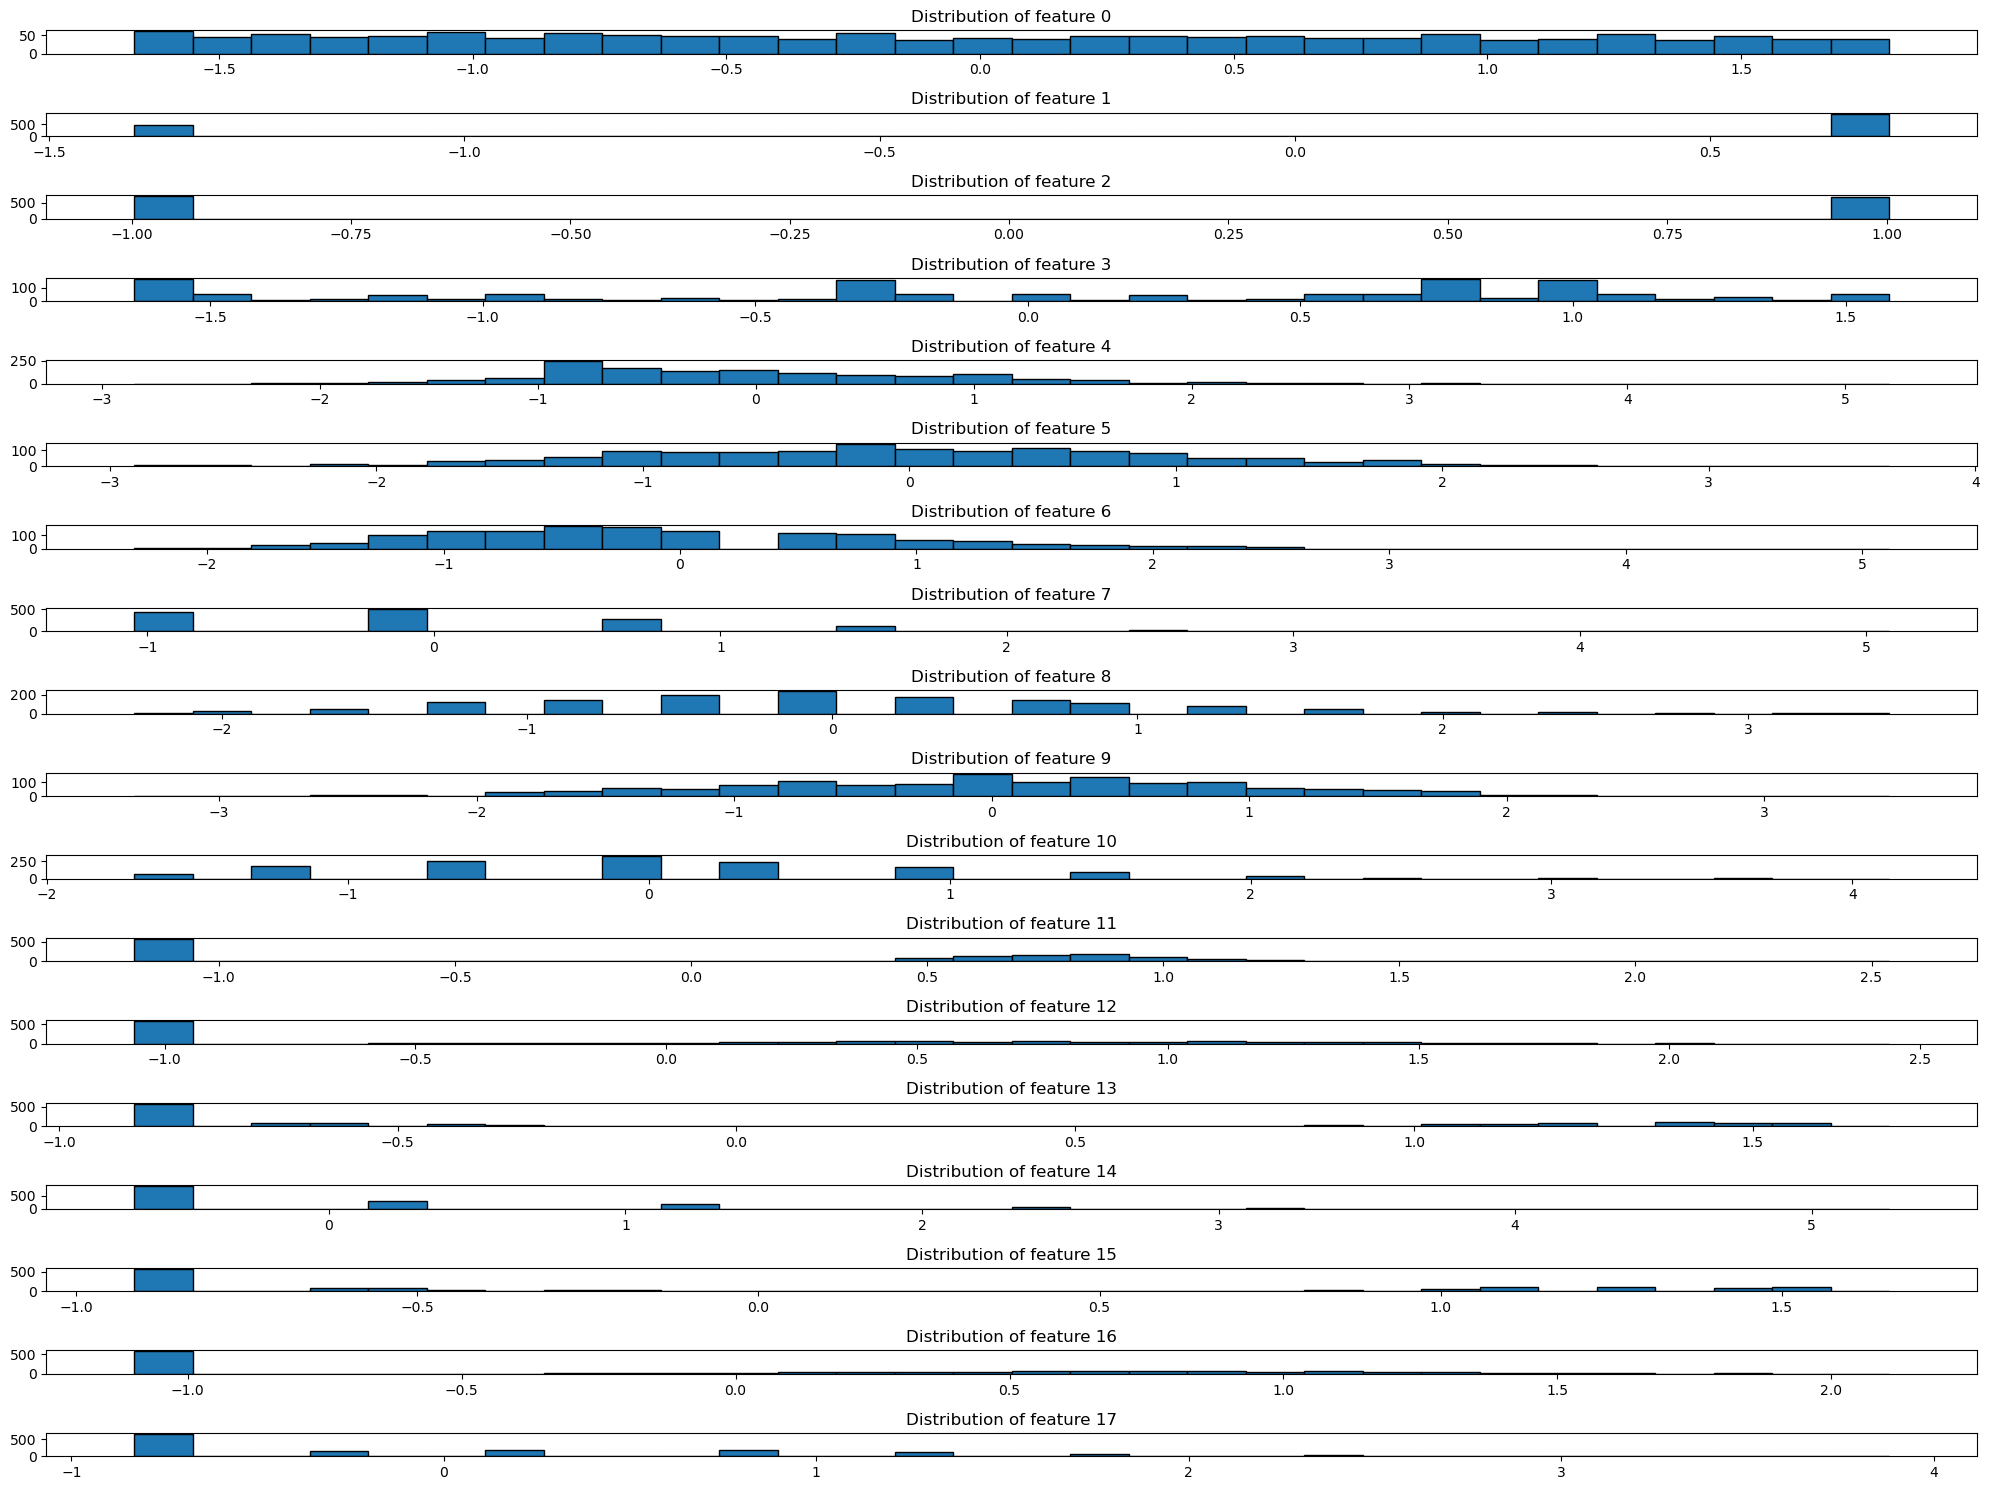

In [44]:
num_features = X_train_scaled.shape[1]
plt.figure(figsize=(20, 15))

for i in range(num_features):
    plt.subplot(num_features, 1, i+1)
    plt.hist(X_train_scaled[:, i], bins=30, edgecolor='k')
    plt.title(f'Distribution of feature {i}')

plt.tight_layout()
plt.show()


In [47]:
pca = PCA()
pca.fit(X_train_scaled)
explained_variance = pca.explained_variance_ratio_
print(f"Explained variance ratio: {explained_variance}")


Explained variance ratio: [2.74435376e-01 1.98697992e-01 7.65556293e-02 6.27733380e-02
 5.84275683e-02 5.37631622e-02 5.04896067e-02 4.97685342e-02
 4.45911110e-02 3.60910397e-02 2.95244805e-02 2.36502341e-02
 1.99900854e-02 1.67406201e-02 3.00871271e-03 9.40720631e-04
 3.95580025e-04 1.56209426e-04]
